In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions as fa

# **Config**

In [2]:
sns.set_theme(style='darkgrid')
title_data = 'Bulk'
paleta = sns.color_palette("tab10").as_hex()

# **Data**
---


**Data Description**

Contains information about Bulk material

- **key** is used to identify the steel batch number.
- **Bulk** bulk material supply data (volume). The volume per unit mass of a dry material plus the volume of the air between its particles.




In [3]:
url_data_bulk = 'https://drive.google.com/file/d/1WqFElWzLW9iGsnHfuDxZK9Wm9Y5ctK0I/view?usp=sharing'
url_data_bulk = 'https://drive.google.com/uc?id=' + url_data_bulk.split('/')[-2]
data_bulk = pd.read_csv(url_data_bulk)

In [4]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [5]:
data_bulk.shape

(3129, 16)

- -There are 3129 batches of bulk-

In [6]:
data_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


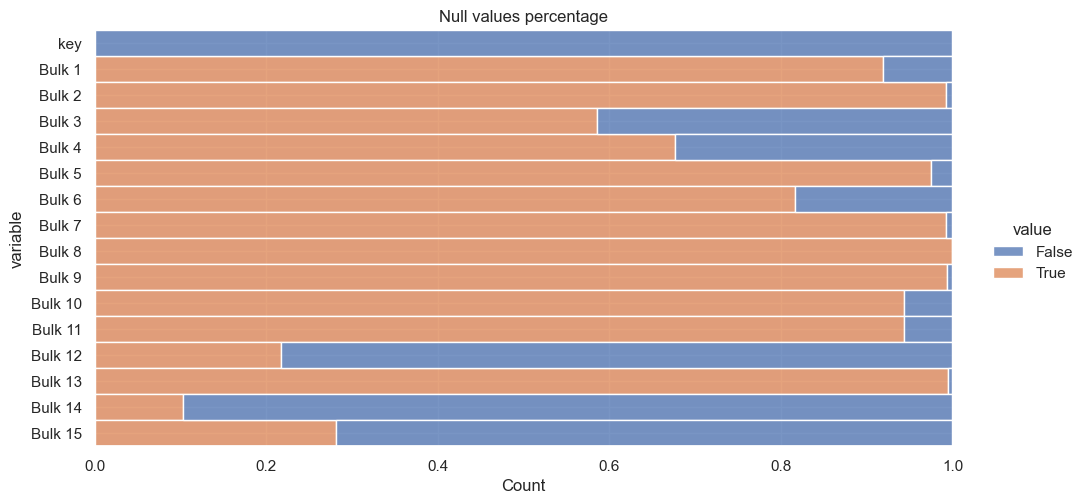

In [7]:
fa.porcentaje_nulos_x_caracteristica(data_bulk, title='Null values percentage')

- Hay un porcentaje grande de valores nulos en la mayoría de columnas, menos a los lotes. 
- -There are many null values in all functions, except in the key column 'batches'-

- Falta la mayoría de los datos en las columnas Bulk 1, Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 13, con un porcentaje superior al 90%.
- -Most of data in columns Bulk 1, Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 10, Bulk 11, Bulk 13 is missing, with a percentage above 90%.-

- Faltan datos en las columnas Bulk 3, Bulk 4, Bulk 6 con un porcentaje entre 50% - 80%
- -There are missing data in columns Bulk 3, Bulk 4, Bulk 6 with a percentage between 50% - 80%-

- Faltan datos en las columnas Bulk 12 y Bulk 15 con un porcentaje entre 21% y 28%.
- -There are missing data in columns Bulk 12 and Bulk 15 with a percentage between 21% - 28%-

- Bulk 14 tiene la menor cantidad de datos faltantes con un porcentaje del 10%.
- -Bulk 14 has the lowest amount of missing data with a percentage of 10%.-


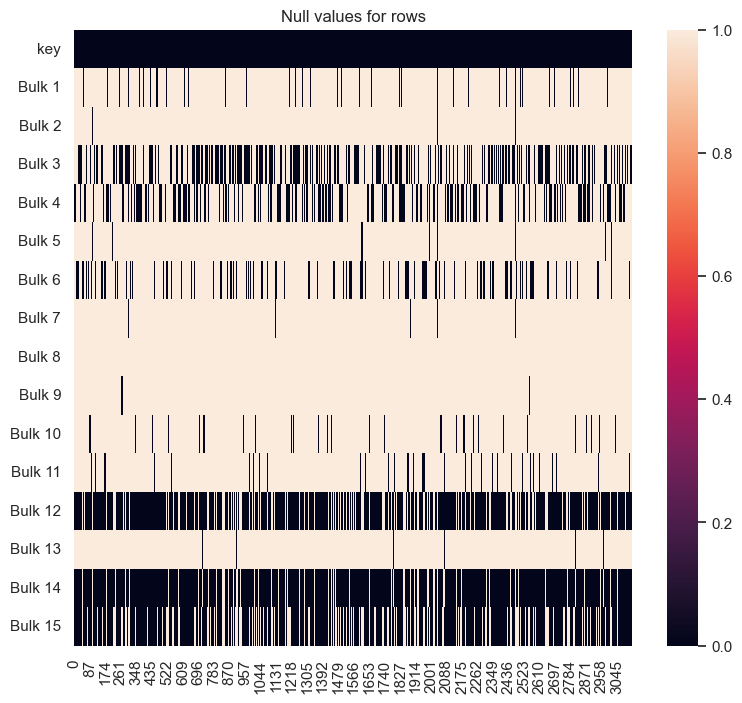

In [8]:
fa.null_features_per_record(data_bulk, title='Null values for rows')

- Los lotes pueden tener más de un tipo de granel, no necesariamente los 15.
- -For batches, there can be more than one type of bulk-

In [9]:
data_bulk['key'].duplicated().sum()

0

- -There are no duplicate data-